In [1]:
#QUESTION2 Convolution Operations with Different Parameters
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

# Define the 5×5 input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]], dtype=np.float32)

# Reshape input to match Conv2D input shape: (batch_size, height, width, channels)
input_matrix = input_matrix.reshape((1, 5, 5, 1))

# Define the 3×3 kernel
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], dtype=np.float32)

# Reshape kernel to match Conv2D filter shape: (height, width, input_channels, output_channels)
kernel = kernel.reshape((3, 3, 1, 1))

# Function to perform convolution with given stride and padding
def apply_convolution(stride, padding):
    model = Sequential([
        Conv2D(filters=1, kernel_size=(3, 3), strides=(stride, stride), padding=padding,
               kernel_initializer=tf.constant_initializer(kernel), use_bias=False, input_shape=(5, 5, 1))
    ])
    output = model.predict(input_matrix)
    return np.squeeze(output)  # Remove unnecessary dimensions

# Perform convolutions with different parameters
output_valid_s1 = apply_convolution(1, 'valid')
output_same_s1 = apply_convolution(1, 'same')
output_valid_s2 = apply_convolution(2, 'valid')
output_same_s2 = apply_convolution(2, 'same')

# Print output feature maps
print("Output (Stride=1, Padding='VALID'):\n", output_valid_s1)
print("Output (Stride=1, Padding='SAME'):\n", output_same_s1)
print("Output (Stride=2, Padding='VALID'):\n", output_valid_s2)
print("Output (Stride=2, Padding='SAME'):\n", output_same_s2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Output (Stride=1, Padding='VALID'):
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Output (Stride=1, Padding='SAME'):
 [[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]
Output (Stride=2, Padding='VALID'):
 [[0. 0.]
 [0. 0.]]
Output (Stride=2, Padding='SAME'):
 [[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


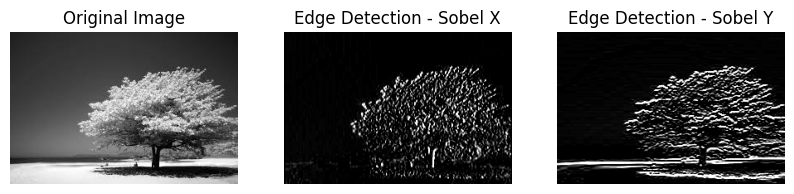

Original Matrix:
 [[6. 5. 0. 5.]
 [7. 8. 9. 0.]
 [3. 6. 9. 8.]
 [2. 5. 3. 4.]]

Max Pooled Matrix:
 [[8. 9.]
 [6. 9.]]

Average Pooled Matrix:
 [[6.5 3.5]
 [4.  6. ]]


In [4]:
#Question3 Task1 Python Code for Edge Detection using Sobel Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = '/content/sample_data/grey.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Unable to load image at {image_path}. Check the file path.")
else:
    # Define Sobel filters
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    # Apply Sobel filters
    edge_x = cv2.filter2D(image, -1, sobel_x)
    edge_y = cv2.filter2D(image, -1, sobel_y)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edge_x, cmap='gray')
    plt.title('Edge Detection - Sobel X')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(edge_y, cmap='gray')
    plt.title('Edge Detection - Sobel Y')
    plt.axis('off')

    plt.show()

#Python Code for Pooling Operations Task2 Max pooling and avg pooling
import tensorflow as tf
import numpy as np

# Create a random 4x4 matrix (ensure dtype is correct)
input_matrix = np.random.randint(0, 10, (1, 4, 4, 1)).astype(np.float32)

# Define MaxPooling and AveragePooling layers
max_pooling = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)
avg_pooling = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)

# Apply pooling operations
max_pooled = max_pooling(input_matrix)
avg_pooled = avg_pooling(input_matrix)

# Print matrices
print("Original Matrix:\n", input_matrix[0, :, :, 0])
print("\nMax Pooled Matrix:\n", max_pooled.numpy()[0, :, :, 0])
print("\nAverage Pooled Matrix:\n", avg_pooled.numpy()[0, :, :, 0])


In [5]:
#QUESTION4)TASK1 Implement AlexNet Architecture
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define AlexNet model
model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for output
])

# Print model summary
model.summary()
#TASK2 implement a Residual Block and ResNet-like Model
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model

# Define a Residual Block
def residual_block(input_tensor, filters):
    x = Conv2D(filters, (3, 3), padding="same", activation="relu")(input_tensor)
    x = Conv2D(filters, (3, 3), padding="same")(x)

    # Skip connection
    x = Add()([x, input_tensor])
    x = tf.keras.layers.Activation("relu")(x)
    return x

# Define a Simple ResNet-like Model
def resnet_model():
    input_layer = Input(shape=(32, 32, 3))  # Input size for CIFAR-10 or similar datasets

    x = Conv2D(64, (7, 7), strides=2, padding="same", activation="relu")(input_layer)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding="same")(x)

    # Apply two residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    output_layer = Dense(10, activation="softmax")(x)  # 10 classes

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Build and summarize ResNet-like model
resnet = resnet_model()
resnet.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 64)     │          9,472 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 8, 8, 64)       │              0 │ conv2d_9[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 8, 8, 64)       │         36,928 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 8, 8, 64)       │         36,928 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 8, 8, 64)       │              0 │ conv2d_11[0][0],       │
│                           │                        │                │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 8, 8, 64)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 8, 8, 64)       │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 8, 8, 64)       │         36,928 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 8, 8, 64)       │              0 │ conv2d_13[0][0],       │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 8, 8, 64)       │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 4096)           │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │        524,416 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 682,890 (2.61 MB)

 Trainable params: 682,890 (2.61 MB)

 Non-trainable params: 0 (0.00 B)